In [2]:
%matplotlib inline

!pip install pygraphml

import matplotlib.pyplot as plt
import os, sys, tempfile
import numpy as np
from pygraphml import Graph
from pygraphml import GraphMLParser

In [24]:
def get_coord_tree (vertex, depth_num):
  shift = 0
  root = 0
  coord_dict = dict()

  if len (nodes_edges[vertex]) == 0:
    contour = np.array([[0, 0]])
    coord_dict[vertex] = (0, depth_num)
    return coord_dict, contour
  
  if len(nodes_edges[vertex]) == 1:
    coord_dict, left_contour = get_coord_tree (nodes_edges[vertex][0], (depth_num - 1))
    contour = np.array([ np.array([0, 0]), *left_contour])
    coord_dict[vertex] = (0, depth_num)
    return coord_dict, contour

  if len(nodes_edges[vertex]) == 2:
    coord_dict, left_contour = get_coord_tree (nodes_edges[vertex][0], (depth_num-1))
    right_coord, right_contour = get_coord_tree (nodes_edges[vertex][1], (depth_num-1))
    min_depth = min(len(left_contour), len(right_contour))
    max_depth = max(len(left_contour), len(right_contour))
    rev_left = left_contour
    rev_right = right_contour
    
    for i in range(min_depth):
      temp = rev_left[i][1] - rev_right[i][0] + 1
      if temp > shift:
        shift = temp

    for i in right_contour:
      i[1] += shift
      i[0] += shift

    rev_left = left_contour
    rev_right = right_contour
    
    contour = np.array(([[0, 0] for i in range(max_depth)]))
    for i in range(max_depth):
      if i >= len(left_contour):
        left = rev_right[i][0]
        right = rev_right[i][1]
      elif i >= len(right_contour):
        left = rev_left[i][0]
        right = rev_left[i][1]
      else:
        left = min(rev_left[i][0], rev_right[i][0])
        right = max(rev_left[i][1], rev_right[i][1])
      contour[i][0] = left
      contour[i][1] = right
    
    coord_dict[vertex] = (root, depth_num)    
    contour =  np.array([np.array([root, root]), *contour])
    shift_right_coord = dict()
    for (node, coord) in right_coord.items():
      shift_right_coord[node] = (coord[0]+shift, coord[1])
    coord_dict.update(shift_right_coord)
    return coord_dict, contour

## XML trees import

## Tree 1

In [5]:
tr1 = """<?xml version="1.0" encoding="UTF-8"?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns"
  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
  xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns
  http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <graph id="tree" edgedefault="directed">
    <node id="n0"/>
    <node id="n1"/>
    <node id="n2"/>
    <node id="n3"/>
    <node id="n4"/>
    <node id="n5"/>
    <node id="n6"/>
    <node id="n7"/>
    <node id="n8"/>
    <node id="n9"/>
    <node id="n10"/>
    <node id="n11"/>
    <node id="n12"/>
    <node id="n13"/>
    <node id="n14"/>
    <node id="n15"/>
    <node id="n16"/>
    <node id="n17"/>
    <node id="n18"/>
    <node id="n19"/>
    <node id="n20"/>
    <node id="n21"/>
    <node id="n22"/>
    <node id="n23"/>
    <node id="n24"/>
    <node id="n25"/>
    <node id="n26"/>
    <node id="n27"/>
    <node id="n28"/>
    <node id="n29"/>
    <node id="n30"/>
    <node id="n31"/>
    <node id="n32"/>
    <node id="n33"/>
    <node id="n34"/>
    <node id="n35"/>
    <node id="n36"/>
    <node id="n37"/>
    <node id="n38"/>
    <node id="n39"/>
    <node id="n40"/>
    <node id="n41"/>
    <node id="n42"/>
    <node id="n43"/>
    <node id="n44"/>
    <node id="n45"/>
    <node id="n46"/>
    <node id="n47"/>
    <node id="n48"/>
    <node id="n49"/>
    <node id="n50"/>
    <node id="n51"/>
    <node id="n52"/>
    <node id="n53"/>
    <node id="n54"/>
    <node id="n55"/>
    <node id="n56"/>
    <node id="n57"/>
    <node id="n58"/>
    <node id="n59"/>
    <edge source="n0" target="n1"/>
    <edge source="n0" target="n48"/>
    <edge source="n1" target="n2"/>
    <edge source="n1" target="n11"/>
    <edge source="n2" target="n3"/>
    <edge source="n2" target="n6"/>
    <edge source="n3" target="n4"/>
    <edge source="n3" target="n5"/>
    <edge source="n6" target="n7"/>
    <edge source="n7" target="n8"/>
    <edge source="n7" target="n9"/>
    <edge source="n9" target="n10"/>
    <edge source="n11" target="n12"/>
    <edge source="n11" target="n37"/>
    <edge source="n12" target="n13"/>
    <edge source="n12" target="n30"/>
    <edge source="n13" target="n14"/>
    <edge source="n13" target="n20"/>
    <edge source="n14" target="n15"/>
    <edge source="n14" target="n18"/>
    <edge source="n15" target="n16"/>
    <edge source="n16" target="n17"/>
    <edge source="n18" target="n19"/>
    <edge source="n20" target="n21"/>
    <edge source="n21" target="n22"/>
    <edge source="n21" target="n25"/>
    <edge source="n22" target="n23"/>
    <edge source="n23" target="n24"/>
    <edge source="n25" target="n26"/>
    <edge source="n25" target="n28"/>
    <edge source="n26" target="n27"/>
    <edge source="n28" target="n29"/>
    <edge source="n30" target="n31"/>
    <edge source="n30" target="n32"/>
    <edge source="n32" target="n33"/>
    <edge source="n32" target="n34"/>
    <edge source="n34" target="n35"/>
    <edge source="n35" target="n36"/>
    <edge source="n37" target="n38"/>
    <edge source="n37" target="n42"/>
    <edge source="n38" target="n39"/>
    <edge source="n39" target="n40"/>
    <edge source="n40" target="n41"/>
    <edge source="n42" target="n43"/>
    <edge source="n42" target="n45"/>
    <edge source="n43" target="n44"/>
    <edge source="n45" target="n46"/>
    <edge source="n45" target="n47"/>
    <edge source="n48" target="n49"/>
    <edge source="n48" target="n58"/>
    <edge source="n49" target="n50"/>
    <edge source="n49" target="n54"/>
    <edge source="n50" target="n51"/>
    <edge source="n51" target="n52"/>
    <edge source="n51" target="n53"/>
    <edge source="n54" target="n55"/>
    <edge source="n55" target="n56"/>
    <edge source="n56" target="n57"/>
    <edge source="n58" target="n59"/>
  </graph>
</graphml>"""

In [25]:
with open('./tr1.xml', 'w') as file:
    file.write(tr1)

parser_obj = GraphMLParser()
ps = parser_obj.parse('tr1.xml')

In [28]:

nodes = ps.nodes()
edges = ps.edges()
nodes_set = set()
nodes_edges = dict()
nodes_coord = dict()

for nd in nodes:
    nodes_set.add(nd.id)
    nodes_edges[nd.id] = np.empty(0)
    nodes_coord[nd.id] = np.zeros(2)

for eg in edges:
    nodes_edges[eg.node1.id] = np.append(nodes_edges[eg.node1.id], eg.node2.id)
    nodes_set.remove(eg.node2.id)

In [29]:
test, contour_test = get_coord_tree (list(nodes_set)[0], 0)
print (test, contour_test)

{'n4': (0, -4), 'n3': (0, -3), 'n5': (1, -4), 'n2': (0, -2), 'n8': (2, -5), 'n7': (2, -4), 'n10': (3, -6), 'n9': (3, -5), 'n6': (2, -3), 'n1': (0, -1), 'n17': (4, -8), 'n16': (4, -7), 'n15': (4, -6), 'n14': (4, -5), 'n19': (5, -7), 'n18': (5, -6), 'n13': (4, -4), 'n24': (6, -9), 'n23': (6, -8), 'n22': (6, -7), 'n21': (6, -6), 'n27': (7, -9), 'n26': (7, -8), 'n25': (7, -7), 'n29': (8, -9), 'n28': (8, -8), 'n20': (6, -5), 'n12': (4, -3), 'n31': (7, -5), 'n30': (7, -4), 'n33': (8, -6), 'n32': (8, -5), 'n36': (9, -8), 'n35': (9, -7), 'n34': (9, -6), 'n11': (4, -2), 'n41': (10, -7), 'n40': (10, -6), 'n39': (10, -5), 'n38': (10, -4), 'n37': (10, -3), 'n44': (11, -6), 'n43': (11, -5), 'n42': (11, -4), 'n46': (12, -6), 'n45': (12, -5), 'n47': (13, -6), 'n0': (0, 0), 'n52': (13, -5), 'n51': (13, -4), 'n53': (14, -5), 'n50': (13, -3), 'n49': (13, -2), 'n57': (15, -6), 'n56': (15, -5), 'n55': (15, -4), 'n54': (15, -3), 'n48': (13, -1), 'n59': (16, -3), 'n58': (16, -2)} [[ 0  0]
 [ 0 13]
 [ 0 16]


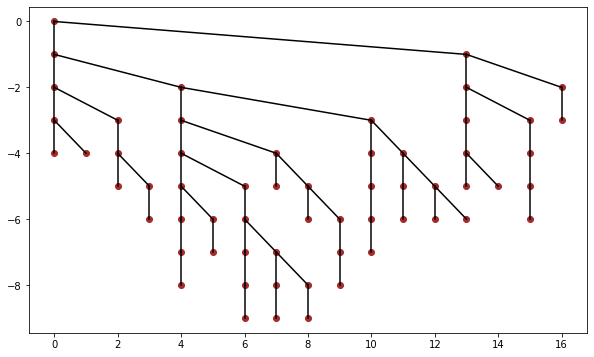

In [30]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(6)

ax.plot([i[0] for i in test.values()], [i[1] for i in test.values()], 'o', color='brown');

for (node, children) in nodes_edges.items():
  parent_coord = test[node]
  for child in children:
    child_coord = test[child]
    x_values = (parent_coord[0], child_coord[0])
    y_values = (parent_coord[1], child_coord[1])
    ax.plot(x_values, y_values, color='black')

plt.show()

## Tree 2

In [31]:
tr2 = """<?xml version="1.0" encoding="UTF-8"?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns"
  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
  xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns
  http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <graph id="tree" edgedefault="directed">
    <node id="n0"/>
    <node id="n1"/>
    <node id="n2"/>
    <node id="n3"/>
    <node id="n4"/>
    <node id="n5"/>
    <node id="n6"/>
    <node id="n7"/>
    <node id="n8"/>
    <node id="n9"/>
    <node id="n10"/>
    <node id="n11"/>
    <node id="n12"/>
    <node id="n13"/>
    <node id="n14"/>
    <node id="n15"/>
    <node id="n16"/>
    <node id="n17"/>
    <node id="n18"/>
    <node id="n19"/>
    <node id="n20"/>
    <node id="n21"/>
    <node id="n22"/>
    <node id="n23"/>
    <node id="n24"/>
    <node id="n25"/>
    <node id="n26"/>
    <node id="n27"/>
    <node id="n28"/>
    <node id="n29"/>
    <node id="n30"/>
    <node id="n31"/>
    <node id="n32"/>
    <node id="n33"/>
    <node id="n34"/>
    <node id="n35"/>
    <node id="n36"/>
    <node id="n37"/>
    <node id="n38"/>
    <node id="n39"/>
    <node id="n40"/>
    <node id="n41"/>
    <node id="n42"/>
    <node id="n43"/>
    <node id="n44"/>
    <node id="n45"/>
    <node id="n46"/>
    <node id="n47"/>
    <node id="n48"/>
    <node id="n49"/>
    <node id="n50"/>
    <node id="n51"/>
    <node id="n52"/>
    <node id="n53"/>
    <node id="n54"/>
    <node id="n55"/>
    <node id="n56"/>
    <node id="n57"/>
    <node id="n58"/>
    <node id="n59"/>
    <node id="n60"/>
    <node id="n61"/>
    <node id="n62"/>
    <node id="n63"/>
    <node id="n64"/>
    <node id="n65"/>
    <node id="n66"/>
    <node id="n67"/>
    <node id="n68"/>
    <node id="n69"/>
    <node id="n70"/>
    <node id="n71"/>
    <edge source="n0" target="n1"/>
    <edge source="n0" target="n24"/>
    <edge source="n1" target="n2"/>
    <edge source="n1" target="n20"/>
    <edge source="n2" target="n3"/>
    <edge source="n2" target="n12"/>
    <edge source="n3" target="n4"/>
    <edge source="n3" target="n9"/>
    <edge source="n4" target="n5"/>
    <edge source="n4" target="n6"/>
    <edge source="n6" target="n7"/>
    <edge source="n7" target="n8"/>
    <edge source="n9" target="n10"/>
    <edge source="n10" target="n11"/>
    <edge source="n12" target="n13"/>
    <edge source="n12" target="n16"/>
    <edge source="n13" target="n14"/>
    <edge source="n14" target="n15"/>
    <edge source="n16" target="n17"/>
    <edge source="n16" target="n18"/>
    <edge source="n18" target="n19"/>
    <edge source="n20" target="n21"/>
    <edge source="n21" target="n22"/>
    <edge source="n22" target="n23"/>
    <edge source="n24" target="n25"/>
    <edge source="n24" target="n41"/>
    <edge source="n25" target="n26"/>
    <edge source="n25" target="n40"/>
    <edge source="n26" target="n27"/>
    <edge source="n26" target="n31"/>
    <edge source="n27" target="n28"/>
    <edge source="n28" target="n29"/>
    <edge source="n29" target="n30"/>
    <edge source="n31" target="n32"/>
    <edge source="n31" target="n37"/>
    <edge source="n32" target="n33"/>
    <edge source="n32" target="n34"/>
    <edge source="n34" target="n35"/>
    <edge source="n35" target="n36"/>
    <edge source="n37" target="n38"/>
    <edge source="n38" target="n39"/>
    <edge source="n41" target="n42"/>
    <edge source="n41" target="n69"/>
    <edge source="n42" target="n43"/>
    <edge source="n42" target="n49"/>
    <edge source="n43" target="n44"/>
    <edge source="n43" target="n46"/>
    <edge source="n44" target="n45"/>
    <edge source="n46" target="n47"/>
    <edge source="n46" target="n48"/>
    <edge source="n49" target="n50"/>
    <edge source="n49" target="n62"/>
    <edge source="n50" target="n51"/>
    <edge source="n51" target="n52"/>
    <edge source="n51" target="n58"/>
    <edge source="n52" target="n53"/>
    <edge source="n53" target="n54"/>
    <edge source="n53" target="n57"/>
    <edge source="n54" target="n55"/>
    <edge source="n54" target="n56"/>
    <edge source="n58" target="n59"/>
    <edge source="n59" target="n60"/>
    <edge source="n59" target="n61"/>
    <edge source="n62" target="n63"/>
    <edge source="n62" target="n65"/>
    <edge source="n63" target="n64"/>
    <edge source="n65" target="n66"/>
    <edge source="n65" target="n68"/>
    <edge source="n66" target="n67"/>
    <edge source="n69" target="n70"/>
    <edge source="n70" target="n71"/>
  </graph>
</graphml>"""

In [32]:
filename = 'tr2.xml'
with open('./'+filename, 'w') as file:
    file.write(tr2)

parser_obj = GraphMLParser()
ps = parser_obj.parse(filename)

In [33]:
nodes = ps.nodes()
edges = ps.edges()
nodes_set = set()
nodes_edges = dict()
nodes_coord = dict()

for nd in nodes:
    nodes_set.add(nd.id)
    nodes_edges[nd.id] = np.empty(0)
    nodes_coord[nd.id] = np.zeros(2)

for eg in edges:
    nodes_edges[eg.node1.id] = np.append(nodes_edges[eg.node1.id], eg.node2.id)
    nodes_set.remove(eg.node2.id)

In [34]:
test_2, contour_test_2 = get_coord_tree (list(nodes_set)[0], 0)

In [35]:
print (test_2)

{'n5': (0, -5), 'n4': (0, -4), 'n8': (1, -7), 'n7': (1, -6), 'n6': (1, -5), 'n3': (0, -3), 'n11': (2, -6), 'n10': (2, -5), 'n9': (2, -4), 'n2': (0, -2), 'n15': (3, -6), 'n14': (3, -5), 'n13': (3, -4), 'n12': (3, -3), 'n17': (4, -5), 'n16': (4, -4), 'n19': (5, -6), 'n18': (5, -5), 'n1': (0, -1), 'n23': (6, -5), 'n22': (6, -4), 'n21': (6, -3), 'n20': (6, -2), 'n0': (0, 0), 'n30': (7, -7), 'n29': (7, -6), 'n28': (7, -5), 'n27': (7, -4), 'n26': (7, -3), 'n33': (8, -6), 'n32': (8, -5), 'n36': (9, -8), 'n35': (9, -7), 'n34': (9, -6), 'n31': (8, -4), 'n39': (10, -7), 'n38': (10, -6), 'n37': (10, -5), 'n25': (7, -2), 'n40': (8, -3), 'n24': (7, -1), 'n45': (11, -6), 'n44': (11, -5), 'n43': (11, -4), 'n47': (12, -6), 'n46': (12, -5), 'n48': (13, -6), 'n42': (11, -3), 'n55': (14, -10), 'n54': (14, -9), 'n56': (15, -10), 'n53': (14, -8), 'n57': (15, -9), 'n52': (14, -7), 'n51': (14, -6), 'n60': (16, -9), 'n59': (16, -8), 'n61': (17, -9), 'n58': (16, -7), 'n50': (14, -5), 'n49': (14, -4), 'n64': (1

In [36]:
print (contour_test_2)

[[ 0  0]
 [ 0  7]
 [ 0 11]
 [ 0 18]
 [ 0 18]
 [ 0 18]
 [ 1 18]
 [ 1 19]
 [ 9 18]
 [14 17]
 [14 15]]


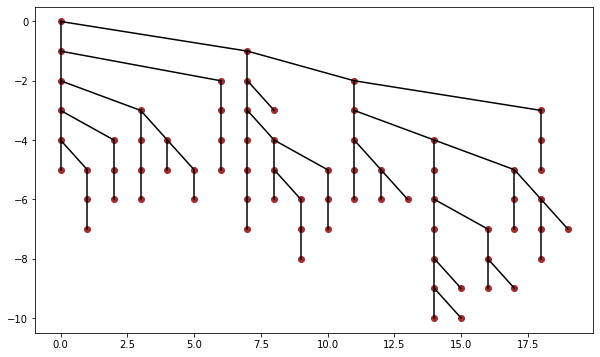

In [ ]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(6)

ax.plot([i[0] for i in test_2.values()], [i[1] for i in test_2.values()], 'o', color='brown');

for (node, children) in nodes_edges.items():
  parent_coord = test_2[node]
  for child in children:
    child_coord = test_2[child]
    x_values = (parent_coord[0], child_coord[0])
    y_values = (parent_coord[1], child_coord[1])
    ax.plot(x_values, y_values, color='black')


plt.show()

## Tree 3

In [41]:
tr3 = """<?xml version="1.0" encoding="UTF-8"?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns"
  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
  xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns
  http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <graph id="tree" edgedefault="directed">
    <node id="n0"/>
    <node id="n1"/>
    <node id="n2"/>
    <node id="n3"/>
    <node id="n4"/>
    <node id="n5"/>
    <node id="n6"/>
    <node id="n7"/>
    <node id="n8"/>
    <node id="n9"/>
    <node id="n10"/>
    <node id="n11"/>
    <node id="n12"/>
    <node id="n13"/>
    <node id="n14"/>
    <node id="n15"/>
    <node id="n16"/>
    <node id="n17"/>
    <node id="n18"/>
    <node id="n19"/>
    <node id="n20"/>
    <node id="n21"/>
    <node id="n22"/>
    <node id="n23"/>
    <node id="n24"/>
    <node id="n25"/>
    <node id="n26"/>
    <node id="n27"/>
    <node id="n28"/>
    <node id="n29"/>
    <node id="n30"/>
    <node id="n31"/>
    <node id="n32"/>
    <node id="n33"/>
    <node id="n34"/>
    <node id="n35"/>
    <node id="n36"/>
    <node id="n37"/>
    <node id="n38"/>
    <node id="n39"/>
    <node id="n40"/>
    <node id="n41"/>
    <node id="n42"/>
    <node id="n43"/>
    <node id="n44"/>
    <node id="n45"/>
    <node id="n46"/>
    <node id="n47"/>
    <node id="n48"/>
    <node id="n49"/>
    <node id="n50"/>
    <node id="n51"/>
    <node id="n52"/>
    <node id="n53"/>
    <node id="n54"/>
    <node id="n55"/>
    <node id="n56"/>
    <node id="n57"/>
    <node id="n58"/>
    <node id="n59"/>
    <node id="n60"/>
    <node id="n61"/>
    <node id="n62"/>
    <node id="n63"/>
    <node id="n64"/>
    <node id="n65"/>
    <node id="n66"/>
    <node id="n67"/>
    <node id="n68"/>
    <node id="n69"/>
    <node id="n70"/>
    <node id="n71"/>
    <node id="n72"/>
    <node id="n73"/>
    <node id="n74"/>
    <node id="n75"/>
    <node id="n76"/>
    <node id="n77"/>
    <node id="n78"/>
    <node id="n79"/>
    <node id="n80"/>
    <node id="n81"/>
    <node id="n82"/>
    <node id="n83"/>
    <edge source="n0" target="n1"/>
    <edge source="n0" target="n2"/>
    <edge source="n2" target="n3"/>
    <edge source="n2" target="n80"/>
    <edge source="n3" target="n4"/>
    <edge source="n3" target="n34"/>
    <edge source="n4" target="n5"/>
    <edge source="n4" target="n30"/>
    <edge source="n5" target="n6"/>
    <edge source="n5" target="n29"/>
    <edge source="n6" target="n7"/>
    <edge source="n6" target="n13"/>
    <edge source="n7" target="n8"/>
    <edge source="n7" target="n10"/>
    <edge source="n8" target="n9"/>
    <edge source="n10" target="n11"/>
    <edge source="n11" target="n12"/>
    <edge source="n13" target="n14"/>
    <edge source="n13" target="n22"/>
    <edge source="n14" target="n15"/>
    <edge source="n14" target="n20"/>
    <edge source="n15" target="n16"/>
    <edge source="n16" target="n17"/>
    <edge source="n17" target="n18"/>
    <edge source="n18" target="n19"/>
    <edge source="n20" target="n21"/>
    <edge source="n22" target="n23"/>
    <edge source="n22" target="n28"/>
    <edge source="n23" target="n24"/>
    <edge source="n23" target="n26"/>
    <edge source="n24" target="n25"/>
    <edge source="n26" target="n27"/>
    <edge source="n30" target="n31"/>
    <edge source="n30" target="n32"/>
    <edge source="n32" target="n33"/>
    <edge source="n34" target="n35"/>
    <edge source="n34" target="n40"/>
    <edge source="n35" target="n36"/>
    <edge source="n35" target="n38"/>
    <edge source="n36" target="n37"/>
    <edge source="n38" target="n39"/>
    <edge source="n40" target="n41"/>
    <edge source="n40" target="n44"/>
    <edge source="n41" target="n42"/>
    <edge source="n42" target="n43"/>
    <edge source="n44" target="n45"/>
    <edge source="n44" target="n68"/>
    <edge source="n45" target="n46"/>
    <edge source="n45" target="n54"/>
    <edge source="n46" target="n47"/>
    <edge source="n46" target="n52"/>
    <edge source="n47" target="n48"/>
    <edge source="n47" target="n50"/>
    <edge source="n48" target="n49"/>
    <edge source="n50" target="n51"/>
    <edge source="n52" target="n53"/>
    <edge source="n54" target="n55"/>
    <edge source="n54" target="n65"/>
    <edge source="n55" target="n56"/>
    <edge source="n55" target="n64"/>
    <edge source="n56" target="n57"/>
    <edge source="n57" target="n58"/>
    <edge source="n57" target="n59"/>
    <edge source="n59" target="n60"/>
    <edge source="n60" target="n61"/>
    <edge source="n61" target="n62"/>
    <edge source="n62" target="n63"/>
    <edge source="n65" target="n66"/>
    <edge source="n66" target="n67"/>
    <edge source="n68" target="n69"/>
    <edge source="n68" target="n70"/>
    <edge source="n70" target="n71"/>
    <edge source="n70" target="n77"/>
    <edge source="n71" target="n72"/>
    <edge source="n72" target="n73"/>
    <edge source="n73" target="n74"/>
    <edge source="n74" target="n75"/>
    <edge source="n75" target="n76"/>
    <edge source="n77" target="n78"/>
    <edge source="n78" target="n79"/>
    <edge source="n80" target="n81"/>
    <edge source="n80" target="n82"/>
    <edge source="n82" target="n83"/>
  </graph>
</graphml>"""

In [42]:
filename = 'tr3.xml'
with open('./'+filename, 'w') as file:
    file.write(tr3)

In [45]:
# def place_graph(filename):
ps = parser_obj.parse(filename)
nodes = ps.nodes()
edges = ps.edges()
nodes_set = set()
nodes_edges = dict()
nodes_coord = dict()

for nd in nodes:
    nodes_set.add(nd.id)
    nodes_edges[nd.id] = np.empty(0)
    nodes_coord[nd.id] = np.zeros(2)

for eg in edges:
    nodes_edges[eg.node1.id] = np.append(nodes_edges[eg.node1.id], eg.node2.id)
    nodes_set.remove(eg.node2.id)

test, contour_test = get_coord_tree (list(nodes_set)[0], 0)
print (test, contour_test)

{'n1': (0, -1), 'n0': (0, 0), 'n9': (1, -8), 'n8': (1, -7), 'n7': (1, -6), 'n12': (2, -9), 'n11': (2, -8), 'n10': (2, -7), 'n6': (1, -5), 'n19': (3, -12), 'n18': (3, -11), 'n17': (3, -10), 'n16': (3, -9), 'n15': (3, -8), 'n14': (3, -7), 'n21': (4, -9), 'n20': (4, -8), 'n13': (3, -6), 'n25': (5, -10), 'n24': (5, -9), 'n23': (5, -8), 'n27': (6, -10), 'n26': (6, -9), 'n22': (5, -7), 'n28': (6, -8), 'n5': (1, -4), 'n29': (2, -5), 'n4': (1, -3), 'n31': (3, -5), 'n30': (3, -4), 'n33': (4, -6), 'n32': (4, -5), 'n3': (1, -2), 'n37': (5, -6), 'n36': (5, -5), 'n35': (5, -4), 'n39': (6, -6), 'n38': (6, -5), 'n34': (5, -3), 'n43': (7, -7), 'n42': (7, -6), 'n41': (7, -5), 'n40': (7, -4), 'n49': (8, -10), 'n48': (8, -9), 'n47': (8, -8), 'n51': (9, -10), 'n50': (9, -9), 'n46': (8, -7), 'n53': (10, -9), 'n52': (10, -8), 'n45': (8, -6), 'n58': (11, -11), 'n57': (11, -10), 'n63': (12, -15), 'n62': (12, -14), 'n61': (12, -13), 'n60': (12, -12), 'n59': (12, -11), 'n56': (11, -9), 'n55': (11, -8), 'n64': (

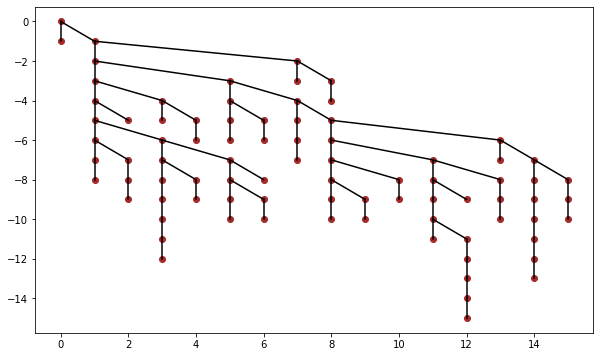

In [46]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(6)

ax.plot([i[0] for i in test.values()], [i[1] for i in test.values()], 'o', color='brown');

for (node, children) in nodes_edges.items():
  parent_coord = test[node]
  for child in children:
    child_coord = test[child]
    x_values = (parent_coord[0], child_coord[0])
    y_values = (parent_coord[1], child_coord[1])
    ax.plot(x_values, y_values, color='black')

plt.show()